In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import pandas as pd
# Set the option to display all columns
pd.set_option('display.max_columns', None)

# renkodf
### Transform Tick Data into OHLCV Renko Dataframe!
![SegmentLocal](readme_files/renkodf_anim.gif "ws_gif")

-----

## Installation
### &nbsp;&nbsp;&nbsp;`pip install renkodf`
#### or just copy *renkodf.py* file to your project!
   - renkodf requires [pandas](https://pypi.org/project/pandas/), [numpy](https://pypi.org/project/numpy/) and [mplfinance](https://pypi.org/project/mplfinance/)

---

## Content
  - **[Usage](#usage)**
  - **[Animation/Realtime Renko Chart](#anim)**
  - **[Performance](#perf)**
  - **[Is the Renko chart calculated correctly?](#calculated)**
  - **[References](#refer)**

---

## <a name="usage"></a>Usage

There are two classes available:
* `Renko(df, brick_size)`
<br>To create Renko OHLCV dataframe with existing Ticks data.
* `RenkoWS(timestamp, price, brick_size, external_df, ts_unit)`
<br>To create real-time Renko charts, usually over a **WebSocket** connection.

Let's start with the first class, load a Pandas DataFrame containing Ticks Data, for example:

In [ ]:
import pandas as pd
df_ticks = pd.read_parquet('examples/data/EURGBP_T1_cT.parquet')
df_ticks.rename(columns={'bid': 'close'}, inplace=True)
df_ticks.head(5)

,ask,close,spread
datetime,,,
2023-06-23 00:00:00.335,0.85950,0.85945,0.00005
2023-06-23 00:00:00.541,0.85951,0.85944,0.00007
2023-06-23 00:00:02.106,0.85950,0.85944,0.00006
2023-06-23 00:00:02.487,0.85950,0.85945,0.00005
2023-06-23 00:00:04.359,0.85951,0.85945,0.00006


---
Only two columns are required:
   * `close`: Mandatory.
   * `datetime`: If is not present, the index will be used.
       
After importing renkodf and setting `brick_size`, just call `renko_df()` with the chosen mode name.<br> 
**See all available modes in [renkodf_modes.ipynb](./examples/renkodf_modes.ipynb)**

In [ ]:
from renkodf import Renko
r = Renko(df_ticks, brick_size=0.0003)
df = r.renko_df('normal', utils_columns=False) # 'wicks' = default
# utils-columns => [direction, is_reversal, tick_index_open, tick_index_close]
df.head(5)

,open,high,low,close,volume
datetime,,,,,
2023-06-23 01:21:58.333,0.8595,0.8598,0.8595,0.8598,3458
2023-06-23 01:33:24.996,0.8598,0.8601,0.8598,0.8601,571
2023-06-23 03:18:30.345,0.8601,0.8604,0.8601,0.8604,4993
2023-06-23 04:40:26.851,0.8604,0.8607,0.8604,0.8607,3358
2023-06-23 05:15:54.438,0.8604,0.8604,0.8601,0.8601,1669


You can use `mpf.plot()` or `r.plot()`, as in the example below.

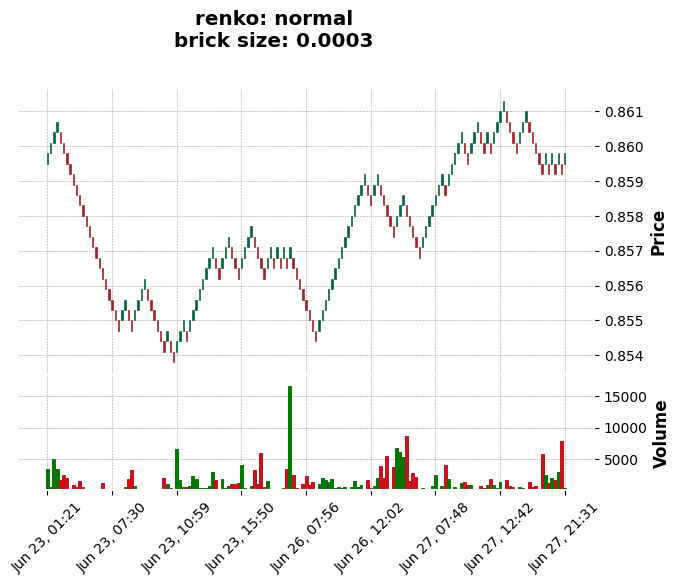

In [ ]:
import mplfinance as mpf
mpf.plot(df, type='candle', volume=True, style="charles",
         title=f"renko: normal\nbrick size: 0.0003")
mpf.show()
# same as:
# r.plot('normal')

As described in [renkodf_modes.ipynb](./examples/renkodf_modes.ipynb), we can have multiple dataframes of different modes from the same instance.

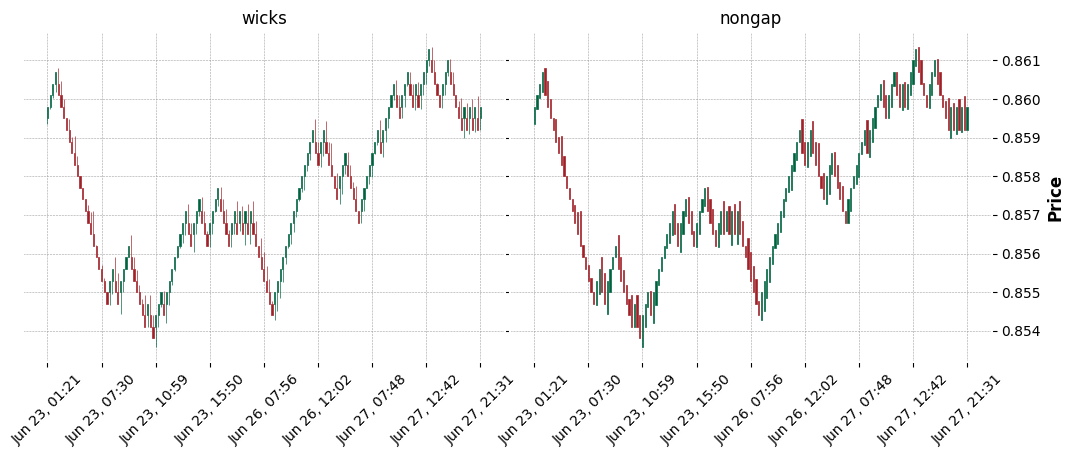

In [ ]:
df_wicks = r.renko_df('wicks')
df_nongap = r.renko_df('nongap')

fig = mpf.figure(style='charles', figsize=(12.5,9))
fig.subplots_adjust(hspace=0.1, wspace=0.01)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

mpf.plot(df_wicks,type='candle',ax=ax1,axtitle='wicks', )
mpf.plot(df_nongap,type='candle',ax=ax2,axtitle='nongap')
mpf.show()

## <a name="anim"></a>Animation/Real-time Renko Chart
To run the animation examples, clone this repository, then into the `renkodf/examples` folder, run:
 * python ws_animchart_demo.py 
 * python ws_multichart_demo.py
 * python ws_externaldf_demo.py

**NOTE:** There are comments, in each of above example files, talking about situations or recommendations to be applied in real cases.

## <a name="perf"></a>Performance-wise
From v2.0, the Renko calculation is powered by **numpy arrays** instead of python **dicts/list** as before, the OHLC variations (modes) are also calculated all at once, **leading to a massive speed-up** in Renko Charts creation. <br>

Regarding "backtest vs real-time" charts, there are 2 tests about the OHLCV reliability between them. <br>
The tests includes creating charts from scratch or using external data (Renko.to_rws())

## <a name="calculated"></a>Is the Renko chart calculated correctly?
I asked myself the same question, how about we see for ourselves? <br>
We are going to do this based on *Spotware's FX/CFD Trading Platform* called **cTrader**,<br>
using *IC Markets/Trading* as Price Provider. 
## **[Let's go!](./examples/comparison_ctrader.ipynb)**

### **RESUME**: Despite the possible occurrence of more/less bricks, the renko calculation used is practically the same, or very approximate.

## <a name="refer"></a>References:
The main logical structure seen in 'Renko._add_prices()' method (versions 1.0/1.1) is a REFORMULATION of the code concepts seen in [Sergey Malchevskiy's pyrenko](https://github.com/quantroom-pro/pyrenko), which in fact, was the first more functional Renko calculation available in python.

### Non-Affiliation Disclaimer
I'm not endorsed by, directly affiliated with, maintained, authorized, or sponsored by any company previously mentioned. 
All product and company names are the registered trademarks of their original owners. 
The use of any trade name or trademark is for identification and reference purposes only and does not imply any association with the trademark holder of their product brand.